In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fe_partition_calc import fe_partition, monte_carlo_iter
sns.set_style("whitegrid")

df = pd.read_excel('Iron_speciation_calculator_input.xlsx')
df.head()

,sample_index,temperature,pressure,log_fO2,SiO2,TiO2,Al2O3,FeO,MnO,MgO,...,Al2O3_std,FeO_std,MnO_std,MgO_std,CaO_std,Na2O_std,K2O_std,P2O5_std,NiO_std,Cr2O3_std
0,NM20ON179-NAB117,1170,100000,-5.77,46.247722,3.248235,13.472798,10.407235,0.177153,7.888806,...,0.082397,0.283317,0.024013,0.066346,0.194975,0.024843,0.044814,0.054433,0.030330,0.022117
1,NY17-209-NAB117,1170,100000,-5.77,41.935408,3.655850,12.241605,10.977930,0.207853,8.442607,...,0.089664,0.467337,0.019052,0.265025,0.336643,0.114493,0.027430,0.087918,0.043071,0.029903
2,AZKS052-NAB117,1170,100000,-5.77,47.535735,2.970344,14.685916,10.288859,0.148575,8.453016,...,0.124454,0.296162,0.032290,0.098748,0.156598,0.155809,0.040070,0.048395,0.031297,0.018810
3,FOGO16-NAB117,1170,100000,-5.77,44.769360,3.274605,13.554178,11.396633,0.203816,8.472814,...,0.109499,0.273379,0.047058,0.090525,0.174016,0.121950,0.041232,0.044732,0.036494,0.015852
4,TDC69-NAB117,1170,100000,-5.77,45.970173,3.371518,13.137186,11.817337,0.158192,7.884144,...,0.130510,0.401834,0.031720,0.077891,0.126857,0.091134,0.025369,0.069086,0.017812,0.021225


#### Generate monte carlo dataframe

In [17]:
#Change number to reflect how many new liquid compositions you wish to generate for that sample
mc_df = monte_carlo_iter(df, 5000)
mc_df.head()

,index,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,Cr2O3,sample_index,temperature,pressure,log_fO2
0,0.0,46.567758,3.106945,13.399106,10.895181,0.126398,7.934321,13.627849,2.416695,2.227050,0.478232,0.014360,0.021553,NM20ON179-NAB117,1170,100000,-5.77
1,0.0,46.360069,3.327793,13.334241,9.580399,0.160546,7.899274,13.024838,2.398951,2.325974,0.538109,0.000000,0.008676,NM20ON179-NAB117,1170,100000,-5.77
2,0.0,46.445343,3.241523,13.408563,10.813506,0.196939,7.850509,13.228846,2.411801,2.284623,0.533714,0.000000,0.032999,NM20ON179-NAB117,1170,100000,-5.77
3,0.0,46.279312,3.216465,13.399188,9.927864,0.161312,7.880854,13.225385,2.383495,2.341092,0.507422,0.000000,0.017112,NM20ON179-NAB117,1170,100000,-5.77
4,0.0,46.444125,3.244775,13.525214,10.576415,0.217790,7.878246,13.305492,2.417120,2.285783,0.476935,0.038915,0.042217,NM20ON179-NAB117,1170,100000,-5.77


#### Input montecarlo dataframe into fe_partition function

##### Run single model

In [18]:
Putirka_2016 = fe_partition(mc_df, mc_df['sample_index'], mc_df['temperature'] + 273.15, mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model='Putirka_2016')

##### Run all models

In [19]:
models = ["IrvineBarager_1971",
            "LeMaitre_1976",
            "Sack_1980",
            "Kress_1991",
            "Kress_1991_lowp",
            "Jayasuriya_2004",
            "Putirka_2016",
            "ONeill_2018",
            "Borisov_2018"]

df_all_models = pd.DataFrame()

for model in models:
    df_fe = fe_partition(mc_df, mc_df['sample_index'], mc_df['temperature'] + 273.15, mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model=model)
    df_fe['model'] = model
    df_all_models = pd.concat([df_all_models, df_fe])

##### Run a chosen selection of models

In [20]:
models_selection = ["Sack_1980",
                    "Kress_1991",
                    "Kress_1991_lowp",
                    "Jayasuriya_2004",
                    "Putirka_2016",
                    "ONeill_2018",
                    "Borisov_2018"]

df_models_selection = pd.DataFrame()

for model in models_selection:
    df_fe = fe_partition(mc_df, mc_df['sample_index'], mc_df['temperature'] + 273.15, mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model=model)
    df_fe['model'] = model
    df_models_selection = pd.concat([df_models_selection, df_fe])

### Plot output data

##### Single model

Text(0.5, 0.98, 'AZKS052-NAB117')

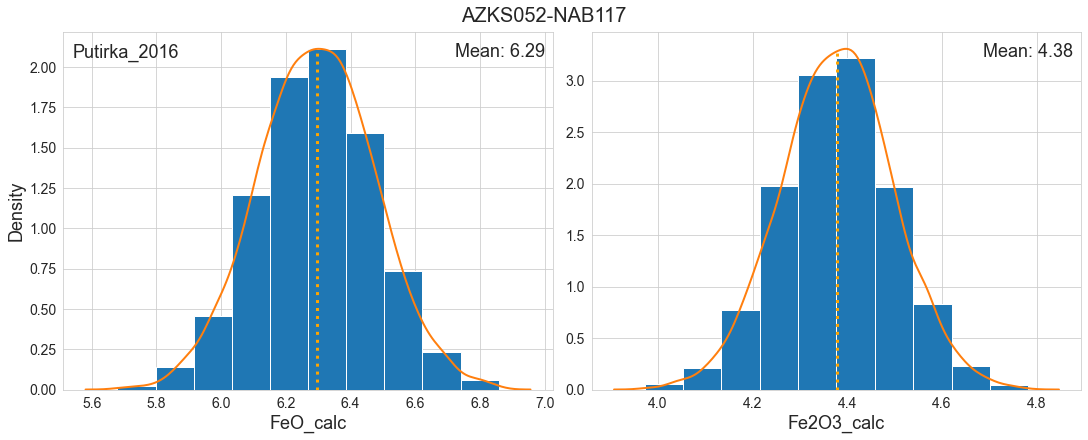

In [21]:
sample_feo = Putirka_2016[Putirka_2016['sample_index'] == 'AZKS052-NAB117']['FeO_calc']
sample_fe2o3 = Putirka_2016[Putirka_2016['sample_index'] == 'AZKS052-NAB117']['Fe2O3_calc']

fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True, sharex='col')

#Plot histogram
ax[0].hist(sample_feo, density=True)
ax[1].hist(sample_fe2o3, density=True)

#Plot KDE
sns.kdeplot(sample_feo, linewidth=2, ax=ax[0])
sns.kdeplot(sample_fe2o3, linewidth=2, ax=ax[1])

#Calculate means and plot as line
sample_feo_mean = sample_feo.mean()
kdeline_feo = ax[0].lines[0]
xs = kdeline_feo.get_xdata()
ys = kdeline_feo.get_ydata()
height_feo = np.interp(sample_feo_mean, xs, ys)
ax[0].vlines(sample_feo_mean, 0, height_feo, 'orange', linewidth=3, ls=':')

sample_fe2o3_mean = sample_fe2o3.mean()
kdeline_fe2o3 = ax[1].lines[0]
xs = kdeline_fe2o3.get_xdata()
ys = kdeline_fe2o3.get_ydata()
height_feo = np.interp(sample_fe2o3_mean, xs, ys)
ax[1].vlines(sample_fe2o3_mean, 0, height_feo, 'orange', linewidth=3, ls=':')


ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

ax[0].annotate("Putirka_2016", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=18)
ax[0].annotate('Mean: {}'.format(round(sample_feo_mean,2)), xy=(0.8, 0.93), xycoords="axes fraction", fontsize=18)
ax[1].annotate('Mean: {}'.format(round(sample_fe2o3_mean,2)), xy=(0.8, 0.93), xycoords="axes fraction", fontsize=18)

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('AZKS052-NAB117', fontsize=20)

##### All models

Text(0.5, 0.98, 'AZKS052-NAB117')

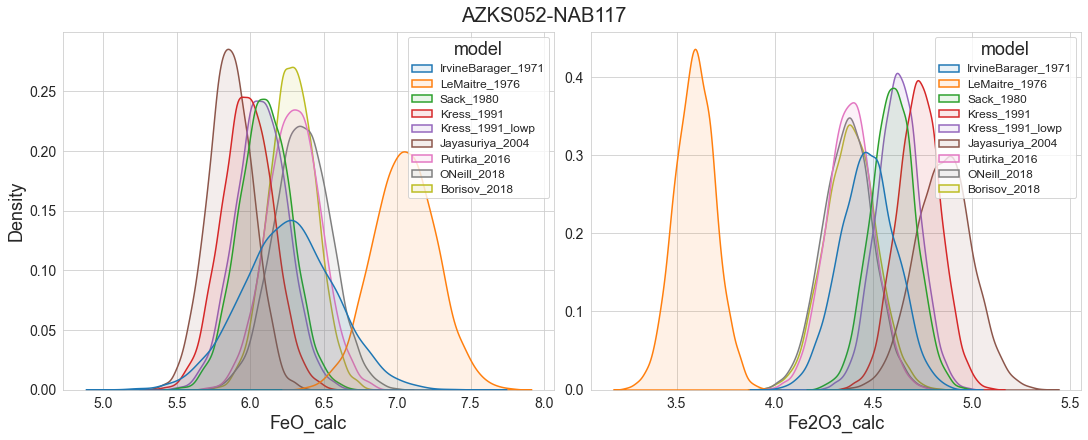

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True)

sns.set_style("whitegrid")
feo_plt = sns.kdeplot(data=df_all_models[df_all_models['sample_index'] == 'AZKS052-NAB117'].reset_index(), x="FeO_calc", hue="model",  linewidth=1.5, alpha=0.1, fill=True, ax=ax[0])
fe2o3_plt = sns.kdeplot(data=df_all_models[df_all_models['sample_index'] == 'AZKS052-NAB117'].reset_index(), x="Fe2O3_calc", hue="model", linewidth=1.5, alpha=0.1, fill=True, ax=ax[1])

ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

plt.setp(feo_plt.get_legend().get_texts(), fontsize='12')
plt.setp(feo_plt.get_legend().get_title(), fontsize='18') 
plt.setp(fe2o3_plt.get_legend().get_texts(), fontsize='12')
plt.setp(fe2o3_plt.get_legend().get_title(), fontsize='18') 

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('AZKS052-NAB117', fontsize=20)

##### Subset of models

Text(0.5, 0.98, 'AZKS052-NAB117')

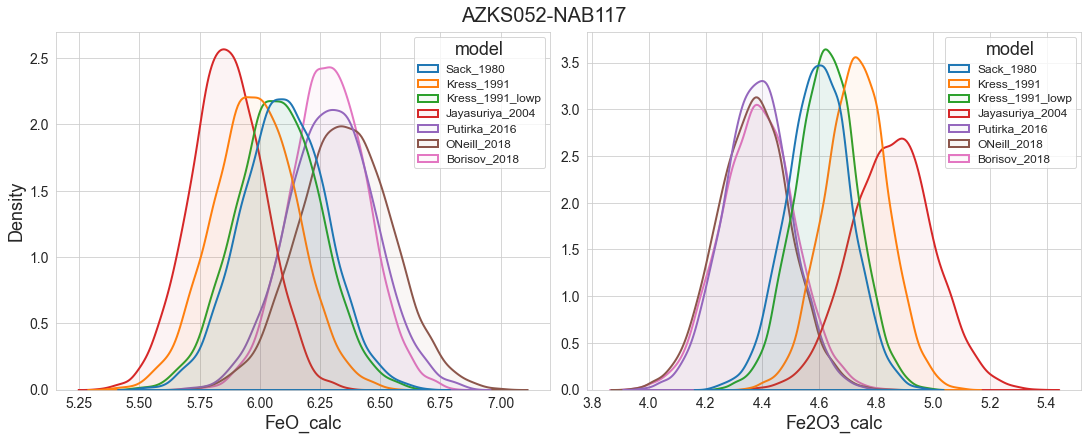

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True)

sns.set_style("whitegrid")
feo_plt = sns.kdeplot(data=df_models_selection[df_models_selection['sample_index'] == 'AZKS052-NAB117'].reset_index(), x="FeO_calc", common_norm=False, hue="model",  linewidth=2, alpha=0.05, fill=True, ax=ax[0])
fe2o3_plt = sns.kdeplot(data=df_models_selection[df_models_selection['sample_index'] == 'AZKS052-NAB117'].reset_index(), x="Fe2O3_calc", common_norm=False, hue="model", linewidth=2, alpha=0.05, fill=True, ax=ax[1])

ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

plt.setp(feo_plt.get_legend().get_texts(), fontsize='12')
plt.setp(feo_plt.get_legend().get_title(), fontsize='18') 
plt.setp(fe2o3_plt.get_legend().get_texts(), fontsize='12')
plt.setp(fe2o3_plt.get_legend().get_title(), fontsize='18') 

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('AZKS052-NAB117', fontsize=20)

### Generate data tables

##### Single model

In [24]:
#One sample at a time
np.mean(Putirka_2016[Putirka_2016['sample_index'] == 'NM20ON179-NAB117']['FeO_calc'])

5.837196846119925

In [25]:
#Table for all samples
#sort = False will preserve order of samples in input sheet, True will sort alphabetically
Putirka_2016.groupby('sample_index', sort=False)[['Fe3Fetot','FeO_calc', 'Fe2O3_calc' ]].agg(['median', 'mean', 'std']) 

Fe3Fetot                      FeO_calc                      \
                    median      mean       std    median      mean       std   
sample_index                                                                   
NM20ON179-NAB117  0.436032  0.436018  0.002237  5.836436  5.837197  0.154656   
NY17-209-NAB117   0.474877  0.474845  0.004812  5.733331  5.731071  0.239823   
AZKS052-NAB117    0.384894  0.384984  0.004765  6.295353  6.294995  0.180192   
FOGO16-NAB117     0.403058  0.403036  0.003938  6.764672  6.766248  0.162692   
TDC69-NAB117      0.421054  0.421066  0.003224  6.803088  6.802034  0.216670   
NM20ON179-test_0  0.436045  0.436055  0.002241  5.841364  5.839733  0.153698   

                 Fe2O3_calc                      
                     median      mean       std  
sample_index                                     
NM20ON179-NAB117   5.014297  5.014931  0.117648  
NY17-209-NAB117    5.762754  5.757847  0.209200  
AZKS052-NAB117     4.379692  4.378944  0.118562  
FOGO16-NAB117      5.077823  5.076569  0.112456  
TDC69-NAB117       5.496998  5.497522  0.156829  
NM20ON179-test_0   5.019530  5.017871  0.116593

##### All models

In [26]:
df_stats = pd.DataFrame()

for model in models:
    df_iter = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False)[['Fe3Fetot','FeO_calc', 'Fe2O3_calc' ]].agg(['median', 'mean', 'std'])
    df_iter['model'] = model
    df_stats = pd.concat([df_stats, df_iter])
    
df_stats.head()

Fe3Fetot                      FeO_calc                      \
                    median      mean       std    median      mean       std   
sample_index                                                                   
NM20ON179-NAB117  0.410821  0.411046  0.012056  6.127217  6.128294  0.272420   
NY17-209-NAB117   0.422004  0.422786  0.023329  6.339597  6.341851  0.468663   
AZKS052-NAB117    0.391398  0.391485  0.017277  6.258188  6.258152  0.315392   
FOGO16-NAB117     0.376996  0.377469  0.019062  7.098192  7.093662  0.328997   
TDC69-NAB117      0.371192  0.371617  0.016865  7.426692  7.427179  0.394205   

                 Fe2O3_calc                                   model  
                     median      mean       std                      
sample_index                                                         
NM20ON179-NAB117   4.748206  4.748470  0.054765  IrvineBarager_1971  
NY17-209-NAB117    5.145910  5.148358  0.180240  IrvineBarager_1971  
AZKS052-NAB117     4.468457  4.469036  0.142856  IrvineBarager_1971  
FOGO16-NAB117      4.774898  4.776043  0.203198  IrvineBarager_1971  
TDC69-NAB117       4.876174  4.874042  0.146696  IrvineBarager_1971

In [27]:
#Sorts by df alphabetically sample name
df_stats.sort_index(level=0, ascending=True, inplace=True)
df_stats.head()

Fe3Fetot                      FeO_calc                      \
                  median      mean       std    median      mean       std   
sample_index                                                                 
AZKS052-NAB117  0.406521  0.406497  0.002868  6.073942  6.073485  0.176176   
AZKS052-NAB117  0.415848  0.415824  0.002888  5.977668  5.977417  0.173788   
AZKS052-NAB117  0.391398  0.391485  0.017277  6.258188  6.258152  0.315392   
AZKS052-NAB117  0.385457  0.385504  0.003057  6.283791  6.283544  0.157810   
AZKS052-NAB117  0.426953  0.426990  0.004351  5.859885  5.861819  0.152594   

               Fe2O3_calc                                   model  
                   median      mean       std                      
sample_index                                                       
AZKS052-NAB117   4.622643  4.622337  0.108710     Kress_1991_lowp  
AZKS052-NAB117   4.728330  4.727894  0.111319          Kress_1991  
AZKS052-NAB117   4.468457  4.469036  0.142856  IrvineBarager_1971  
AZKS052-NAB117   4.381411  4.381460  0.130332        Borisov_2018  
AZKS052-NAB117   4.857244  4.854903  0.144383     Jayasuriya_2004

### Create output file for all oxides

##### Single model

In [28]:
Putirka_2016_means = Putirka_2016.groupby('sample_index', sort=False).mean()
Putirka_2016_std = Putirka_2016.groupby('sample_index', sort=False).std().add_suffix('_std')
Putirka_2016_size = Putirka_2016.groupby('sample_index', sort=False).size()

Putirka_2016_out = (pd.concat([Putirka_2016_means, Putirka_2016_std], axis=1))
Putirka_2016_out.insert(0, 'mc', Putirka_2016_size)
Putirka_2016_out.head()

,mc,SiO2,TiO2,Al2O3,FeO_calc,Fe2O3_calc,MnO,MgO,CaO,Na2O,...,MgO_std,CaO_std,Na2O_std,K2O_std,P2O5_std,Cr2O3_std,NiO_std,total_std,Fe3Fetot_std,XFe2O3_XFeO_std
sample_index,,,,,,,,,,,,,,,,,,,,,
NM20ON179-NAB117,5000,46.013345,3.232166,13.404076,5.837197,5.014931,0.176095,7.848833,13.186232,2.419181,...,0.069798,0.174992,0.026117,0.044455,0.054046,0.017346,0.022055,1.746781e-14,0.002237,0.003517
NY17-209-NAB117,5000,41.693928,3.627335,12.168633,5.731071,5.757847,0.206378,8.392588,16.609822,2.518730,...,0.250594,0.300457,0.112652,0.031607,0.086076,0.024665,0.035338,2.183516e-14,0.004812,0.008730
AZKS052-NAB117,5000,47.329739,2.956032,14.620785,6.294995,4.378944,0.147862,8.413447,12.221576,2.460283,...,0.097627,0.143610,0.154049,0.039566,0.048385,0.014367,0.025879,1.787586e-14,0.004765,0.006302
FOGO16-NAB117,5000,44.540960,3.259403,13.482825,6.766248,5.076569,0.202797,8.428005,14.365843,1.873891,...,0.095880,0.163803,0.118023,0.041551,0.043835,0.013660,0.030253,2.267738e-14,0.003938,0.005526
TDC69-NAB117,5000,45.715442,3.355480,13.063101,6.802034,5.497522,0.156310,7.840509,12.995627,2.354945,...,0.081502,0.129119,0.088846,0.026640,0.069086,0.017401,0.014343,2.214380e-14,0.003224,0.004811


##### All models + create output excel file

In [30]:
stats_dict = {}

with pd.ExcelWriter("Iron_speciation_calculator_output.xlsx") as writer:
    for model in models:
        df_iter_means = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).mean()
        df_iter_std = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).std().add_suffix('_std')
        df_iter_size = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).size()

        df_iter_concat = pd.concat([df_iter_means, df_iter_std], axis=1)
        df_iter_concat.insert(0, 'mc', df_iter_size)
        df_iter_concat['model'] = model
        stats_dict[model] = df_iter_concat
        df_iter_concat.to_excel(writer, sheet_name=model) 

##### Select model of interest from dictionary

In [31]:
stats_dict['Putirka_2016']

,mc,SiO2,TiO2,Al2O3,FeO_calc,Fe2O3_calc,MnO,MgO,CaO,Na2O,...,P2O5_std,Cr2O3_std,NiO_std,total_std,Fe3Fetot_std,XFe2O3_XFeO_std,Fe2O3_FeO_std,Fe3_Fe2_std,XFeO15_XFeO_std,model
sample_index,,,,,,,,,,,,,,,,,,,,,
NM20ON179-NAB117,5000,46.013345,3.232166,13.404076,5.837197,5.014931,0.176095,7.848833,13.186232,2.419181,...,0.054046,0.017346,0.022055,1.746781e-14,0.002237,0.003517,NaN,NaN,NaN,Putirka_2016
NY17-209-NAB117,5000,41.693928,3.627335,12.168633,5.731071,5.757847,0.206378,8.392588,16.609822,2.518730,...,0.086076,0.024665,0.035338,2.183516e-14,0.004812,0.008730,NaN,NaN,NaN,Putirka_2016
AZKS052-NAB117,5000,47.329739,2.956032,14.620785,6.294995,4.378944,0.147862,8.413447,12.221576,2.460283,...,0.048385,0.014367,0.025879,1.787586e-14,0.004765,0.006302,NaN,NaN,NaN,Putirka_2016
FOGO16-NAB117,5000,44.540960,3.259403,13.482825,6.766248,5.076569,0.202797,8.428005,14.365843,1.873891,...,0.043835,0.013660,0.030253,2.267738e-14,0.003938,0.005526,NaN,NaN,NaN,Putirka_2016
TDC69-NAB117,5000,45.715442,3.355480,13.063101,6.802034,5.497522,0.156310,7.840509,12.995627,2.354945,...,0.069086,0.017401,0.014343,2.214380e-14,0.003224,0.004811,NaN,NaN,NaN,Putirka_2016
NM20ON179-test_0,5000,46.021107,3.231914,13.407256,5.839733,5.017871,0.175987,7.850412,13.188819,2.419542,...,0.053768,0.017426,0.000000,1.681139e-14,0.002241,0.003522,NaN,NaN,NaN,Putirka_2016
